In [1]:
# Imports
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import os
import pickle

In [2]:
# Open and convert a input
# image from BGR to GRAYSCALE
image = cv.imread(filename = 'Figures/input.png',
                   flags = cv.IMREAD_GRAYSCALE)

In [3]:
# SIFT is a feature detector and descriptor

# Initiate SIFT detector
SIFT = cv.xfeatures2d.SIFT_create()

In [4]:
 # Find the keypoints with SIFT
keypoints = SIFT.detect(image, None)

# Print number of keypoints detected
print("Number of keypoints Detected:", len(keypoints), "\n")

Number of keypoints Detected: 210 



In [5]:
# Save Keypoints to a file

index = []

for point in keypoints:
    temp = (point.pt,
            point.size,
            point.angle,
            point.response,
            point.octave, 
            point.class_id)
    
    index.append(temp)
    
# File name
filename = "Outputs/SIFT-keypoints.txt"

# Delete a file if it exists
if os.path.exists(filename):
    os.remove(filename)

# Open a file
file = open(filename, "wb")

# Write 
file.write(pickle.dumps(index))

# Close a file
file.close()

In [6]:
# Compute the descriptors with SIFT
keypoints, descriptors = SIFT.compute(image, keypoints)

# Print the descriptor size in bytes
print("Size of Descriptor:", SIFT.descriptorSize(), "\n")

# Print the descriptor type
print("Type of Descriptor:", SIFT.descriptorType(), "\n")

# Print the default norm type
print("Default Norm Type:", SIFT.defaultNorm(), "\n")

# Print shape of descriptor
print("Shape of Descriptor:", descriptors.shape, "\n")

Size of Descriptor: 128 

Type of Descriptor: 5 

Default Norm Type: 4 

Shape of Descriptor: (210, 128) 



In [7]:
# Draw only 50 keypoints on input image
image = cv.drawKeypoints(image = image,
                         keypoints = keypoints[:50],
                         outImage = None,
                         flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

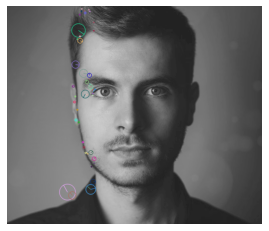

In [8]:
# Plot input image

# Turn interactive plotting off
plt.ioff()

# Create a new figure
plt.figure()
plt.axis('off')
plt.imshow(image)
plt.show()

plt.imsave(fname = 'Figures/feature-detection-SIFT.png',
           arr = image,
           dpi = 300)

# Close it
plt.close()